In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels import robust
%matplotlib inline

## Tarea 3:

Integrantes:

Sebastian Neely   
Eugenio Paz  
Vittorio Pesenti  
Nicolas Nieto  
Adolfo Godoy  
Nicolas Emeterio Guzman  
Cristobal Varas

## Día de más movilidad en cuarentena en la RM?

In [13]:
# Dataframe de apple:
df = pd.read_csv("C:/Users/epazr/Downloads/Analisis de datos/applemobilitytrends-2021-12-05.csv", sep=',', low_memory = False)

In [21]:
# Filtros para seleccionar solo RM 
#df2 = df[(df['region'] == 'Santiago') | (df['region'] == 'Santiago Metropolitan Region')]
#filtro2 = df['region'] == 'Santiago Metropolitan Region'
df2 = df[df['region'] == 'Santiago']

In [22]:
df2

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2021-11-26,2021-11-27,2021-11-28,2021-11-29,2021-11-30,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05
791,city,Santiago,driving,Santiago de Chile,Santiago Metropolitan Region,Chile,100.0,101.96,105.49,107.92,...,140.18,124.89,77.73,101.78,109.77,116.10,115.88,154.11,134.38,84.19
792,city,Santiago,walking,Santiago de Chile,Santiago Metropolitan Region,Chile,100.0,104.69,106.20,105.99,...,122.01,99.27,57.31,97.68,106.98,115.78,111.88,137.30,109.89,62.87


In [7]:
# Aplicar filtros:
# df.where(filtro1 | filtro2, inplace = True)

In [9]:
# Eliminar filas Na que no se porque seguian apareciendo:
# df = df[df['region'].notna()]

In [16]:
#df2.dropna(inplace=True)

## Se optará por mantener las filas 791 y 792, por redundancia en los datos

In [23]:
# df2.drop(df.index[[2,3]], inplace = True)
df2.drop(['geo_type', 'region', 'alternative_name', 'country', 'sub-region'], axis = 1, inplace = True)

C:\Users\epazr\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [24]:
pivote = df2.melt(id_vars=['transportation_type'], var_name="fecha", value_name="indice") 

In [25]:
pivote

,transportation_type,fecha,indice
0,driving,2020-01-13,100.00
1,walking,2020-01-13,100.00
2,driving,2020-01-14,101.96
3,walking,2020-01-14,104.69
4,driving,2020-01-15,105.49
...,...,...,...
1381,walking,2021-12-03,137.30
1382,driving,2021-12-04,134.38
1383,walking,2021-12-04,109.89
1384,driving,2021-12-05,84.19


In [26]:
pivote['fecha'] = pd.to_datetime(pivote['fecha'])

In [27]:
driving = pivote[pivote['transportation_type'] == 'driving']

In [28]:
walking = pivote[pivote['transportation_type'] == 'walking']

In [17]:
walking

,transportation_type,fecha,indice
1,walking,2020-01-13,100.00
3,walking,2020-01-14,104.69
5,walking,2020-01-15,106.20
7,walking,2020-01-16,105.99
9,walking,2020-01-17,105.57
...,...,...,...
1377,walking,2021-12-01,115.78
1379,walking,2021-12-02,111.88
1381,walking,2021-12-03,137.30
1383,walking,2021-12-04,109.89


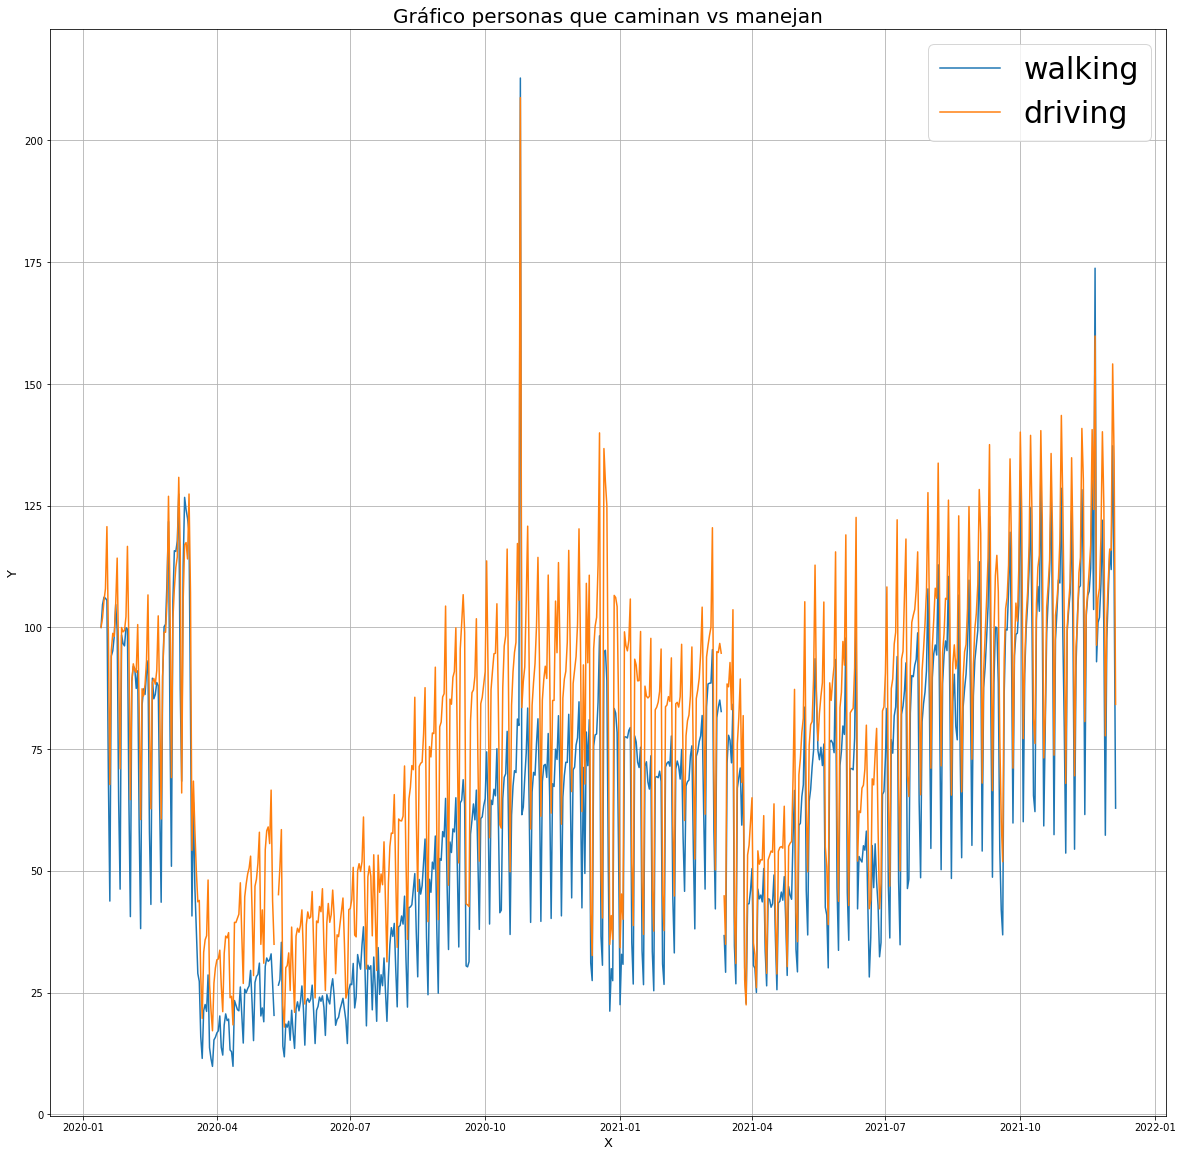

In [30]:
x=walking["fecha"]
y1 = walking["indice"]
y2 = driving["indice"]
plt.figure(figsize=(20,20))
plt.plot(x,y1, label='walking')
plt.plot(x,y2, label = 'driving')


plt.xlabel("X",fontsize=13)
plt.ylabel("Y",fontsize=13)
plt.legend(fontsize=30)

plt.title('Gráfico personas que caminan vs manejan',fontsize=20)
plt.grid()
plt.show()

## Se observa que hubieron mas personas manejando que caminando

## --
- A continuación se trabajará con el df de Google y df PlanPasoaPaso para responder la segunda pregunta ¿Los parques se visitaban mas en la RM?

In [19]:
# Dataframe de google:

In [31]:
google = pd.read_csv("https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv", sep=',', low_memory = False)

In [21]:
google = google[google['sub_region_1'] == 'Santiago Metropolitan Region']

In [20]:
# Definir lo que es una cuarentena: Es completa para la region?
# Nuestro grupo definió como cuarentena, cuando todas las comunas estén en fase 1

In [21]:
google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4606 entries, 2224492 to 2229097
Data columns (total 15 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   country_region_code                                 4606 non-null   object 
 1   country_region                                      4606 non-null   object 
 2   sub_region_1                                        4606 non-null   object 
 3   sub_region_2                                        3948 non-null   object 
 4   metro_area                                          0 non-null      object 
 5   iso_3166_2_code                                     658 non-null    object 
 6   census_fips_code                                    0 non-null      float64
 7   place_id                                            4606 non-null   object 
 8   date                                                4606 non-null   o

In [23]:
#Ordeno por fechas
google.sort_values(by='date', ascending=True)  
google

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
2224492,CL,Chile,Santiago Metropolitan Region,NaN,NaN,CL-RM,NaN,ChIJUR74fWpvYpYR2oNLRG3CzWA,2020-02-15,-10.0,-7.0,-9.0,-7.0,-4.0,0.0
2224493,CL,Chile,Santiago Metropolitan Region,NaN,NaN,CL-RM,NaN,ChIJUR74fWpvYpYR2oNLRG3CzWA,2020-02-16,-6.0,-3.0,-12.0,-2.0,0.0,-1.0
2224494,CL,Chile,Santiago Metropolitan Region,NaN,NaN,CL-RM,NaN,ChIJUR74fWpvYpYR2oNLRG3CzWA,2020-02-17,-8.0,-3.0,-10.0,-8.0,-9.0,1.0
2224495,CL,Chile,Santiago Metropolitan Region,NaN,NaN,CL-RM,NaN,ChIJUR74fWpvYpYR2oNLRG3CzWA,2020-02-18,-9.0,-4.0,-10.0,-8.0,-8.0,1.0
2224496,CL,Chile,Santiago Metropolitan Region,NaN,NaN,CL-RM,NaN,ChIJUR74fWpvYpYR2oNLRG3CzWA,2020-02-19,-8.0,-4.0,-10.0,-8.0,-8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229093,CL,Chile,Santiago Metropolitan Region,Talagante Province,NaN,NaN,NaN,ChIJv825d6jjYpYREU_tQqXBG8M,2021-11-29,24.0,30.0,6.0,-11.0,20.0,9.0
2229094,CL,Chile,Santiago Metropolitan Region,Talagante Province,NaN,NaN,NaN,ChIJv825d6jjYpYREU_tQqXBG8M,2021-11-30,31.0,45.0,13.0,-6.0,23.0,8.0
2229095,CL,Chile,Santiago Metropolitan Region,Talagante Province,NaN,NaN,NaN,ChIJv825d6jjYpYREU_tQqXBG8M,2021-12-01,30.0,41.0,5.0,-5.0,22.0,8.0
2229096,CL,Chile,Santiago Metropolitan Region,Talagante Province,NaN,NaN,NaN,ChIJv825d6jjYpYREU_tQqXBG8M,2021-12-02,31.0,38.0,14.0,-4.0,20.0,8.0


In [22]:
#Dejamos algunas columnas
Google = pd.DataFrame(google)[['sub_region_1','date','retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline','residential_percent_change_from_baseline']]
Google

,sub_region_1,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
2224492,Santiago Metropolitan Region,2020-02-15,-10.0,-7.0,-9.0,-7.0,-4.0,0.0
2224493,Santiago Metropolitan Region,2020-02-16,-6.0,-3.0,-12.0,-2.0,0.0,-1.0
2224494,Santiago Metropolitan Region,2020-02-17,-8.0,-3.0,-10.0,-8.0,-9.0,1.0
2224495,Santiago Metropolitan Region,2020-02-18,-9.0,-4.0,-10.0,-8.0,-8.0,1.0
2224496,Santiago Metropolitan Region,2020-02-19,-8.0,-4.0,-10.0,-8.0,-8.0,1.0
...,...,...,...,...,...,...,...,...
2229093,Santiago Metropolitan Region,2021-11-29,24.0,30.0,6.0,-11.0,20.0,9.0
2229094,Santiago Metropolitan Region,2021-11-30,31.0,45.0,13.0,-6.0,23.0,8.0
2229095,Santiago Metropolitan Region,2021-12-01,30.0,41.0,5.0,-5.0,22.0,8.0
2229096,Santiago Metropolitan Region,2021-12-02,31.0,38.0,14.0,-4.0,20.0,8.0


In [44]:
#Renombramos columnas
Google = Google.rename(columns={'sub_region_1':'Nombre_Region',
                                'date':'fecha',
                         'retail_and_recreation_percent_change_from_baseline':'I_recreation',
                         'grocery_and_pharmacy_percent_change_from_baseline':'I_grocery_pharmacy',
                         'parks_percent_change_from_baseline':'I_parks',
                         'transit_stations_percent_change_from_baseline':'I_transit_stations',
                         'workplaces_percent_change_from_baseline':'I_workplaces',
                         'residential_percent_change_from_baseline':'I_residential',})

In [45]:
Google

,Nombre_Region,fecha,I_recreation,I_grocery_pharmacy,I_parks,I_transit_stations,I_workplaces,I_residential
2224492,Santiago Metropolitan Region,2020-02-15,-10.0,-7.0,-9.0,-7.0,-4.0,0.0
2227782,Santiago Metropolitan Region,2020-02-15,-11.0,-6.0,-11.0,-7.0,-4.0,0.0
2226466,Santiago Metropolitan Region,2020-02-15,-1.0,-3.0,-3.0,-2.0,-4.0,-1.0
2225150,Santiago Metropolitan Region,2020-02-15,-8.0,-7.0,-8.0,10.0,-2.0,0.0
2228440,Santiago Metropolitan Region,2020-02-15,-4.0,1.0,2.0,-9.0,-3.0,0.0
...,...,...,...,...,...,...,...,...
2226465,Santiago Metropolitan Region,2021-12-03,12.0,24.0,-11.0,41.0,14.0,9.0
2227781,Santiago Metropolitan Region,2021-12-03,20.0,35.0,-8.0,136.0,29.0,7.0
2225807,Santiago Metropolitan Region,2021-12-03,56.0,50.0,54.0,46.0,26.0,7.0
2227123,Santiago Metropolitan Region,2021-12-03,27.0,33.0,36.0,12.0,22.0,8.0


In [46]:
#Ordeno por fechas
Google2=Google.sort_values(by='fecha', ascending=True)  
Google2

,Nombre_Region,fecha,I_recreation,I_grocery_pharmacy,I_parks,I_transit_stations,I_workplaces,I_residential
2224492,Santiago Metropolitan Region,2020-02-15,-10.0,-7.0,-9.0,-7.0,-4.0,0.0
2227782,Santiago Metropolitan Region,2020-02-15,-11.0,-6.0,-11.0,-7.0,-4.0,0.0
2226466,Santiago Metropolitan Region,2020-02-15,-1.0,-3.0,-3.0,-2.0,-4.0,-1.0
2225150,Santiago Metropolitan Region,2020-02-15,-8.0,-7.0,-8.0,10.0,-2.0,0.0
2228440,Santiago Metropolitan Region,2020-02-15,-4.0,1.0,2.0,-9.0,-3.0,0.0
...,...,...,...,...,...,...,...,...
2225149,Santiago Metropolitan Region,2021-12-03,5.0,32.0,-1.0,5.0,6.0,9.0
2226465,Santiago Metropolitan Region,2021-12-03,12.0,24.0,-11.0,41.0,14.0,9.0
2227781,Santiago Metropolitan Region,2021-12-03,20.0,35.0,-8.0,136.0,29.0,7.0
2225807,Santiago Metropolitan Region,2021-12-03,56.0,50.0,54.0,46.0,26.0,7.0


In [26]:
#Leemos df Plan paso a paso
PlanPasoP=pd.read_csv('https://github.com/MinCiencia/Datos-COVID19/blob/master/input/Paso_a_paso/paso_a_paso.csv?raw=true', sep=',')

In [27]:
#Pasamos las fechas desde columnas a filas
PlanPasoP2=PlanPasoP.melt(id_vars=["codigo_region","region_residencia","codigo_comuna","comuna_residencia","zona"], var_name="fecha", value_name="paso")
PlanPasoP2

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,fecha,paso
0,15,Arica y Parinacota,15101,Arica,Rural,2020-07-28,3
1,15,Arica y Parinacota,15101,Arica,Urbana,2020-07-28,1
2,15,Arica y Parinacota,15102,Camarones,Total,2020-07-28,3
3,15,Arica y Parinacota,15202,General Lagos,Total,2020-07-28,3
4,15,Arica y Parinacota,15201,Putre,Total,2020-07-28,3
...,...,...,...,...,...,...,...
190891,12,Magallanes,12101,Punta Arenas,Total,2021-12-01,4
190892,12,Magallanes,12103,Río Verde,Total,2021-12-01,4
190893,12,Magallanes,12104,San Gregorio,Total,2021-12-01,4
190894,12,Magallanes,12303,Timaukel,Total,2021-12-01,4


In [29]:
#Renombramos columnas:
PlanPasoP2 = PlanPasoP2.rename(columns={'region_residencia':'Nombre_Region','comuna_residencia':'Nombre_Comuna','codigo_comuna':'Codigo_Comuna'})
PlanPasoP2

,codigo_region,Nombre_Region,Codigo_Comuna,Nombre_Comuna,zona,fecha,paso
0,15,Arica y Parinacota,15101,Arica,Rural,2020-07-28,3
1,15,Arica y Parinacota,15101,Arica,Urbana,2020-07-28,1
2,15,Arica y Parinacota,15102,Camarones,Total,2020-07-28,3
3,15,Arica y Parinacota,15202,General Lagos,Total,2020-07-28,3
4,15,Arica y Parinacota,15201,Putre,Total,2020-07-28,3
...,...,...,...,...,...,...,...
190891,12,Magallanes,12101,Punta Arenas,Total,2021-12-01,4
190892,12,Magallanes,12103,Río Verde,Total,2021-12-01,4
190893,12,Magallanes,12104,San Gregorio,Total,2021-12-01,4
190894,12,Magallanes,12303,Timaukel,Total,2021-12-01,4


In [34]:
#Eliminamos columnas que no necesitaremos
PlanPasoP3 = PlanPasoP2.drop(['codigo_region','Codigo_Comuna','Nombre_Comuna','zona'], axis=1)
PlanPasoP3

,Nombre_Region,fecha,paso
0,Arica y Parinacota,2020-07-28,3
1,Arica y Parinacota,2020-07-28,1
2,Arica y Parinacota,2020-07-28,3
3,Arica y Parinacota,2020-07-28,3
4,Arica y Parinacota,2020-07-28,3
...,...,...,...
190891,Magallanes,2021-12-01,4
190892,Magallanes,2021-12-01,4
190893,Magallanes,2021-12-01,4
190894,Magallanes,2021-12-01,4


In [37]:
#Dejamos filas que tengan solo a la región metropolitana
PlanPasoP4 = PlanPasoP3[PlanPasoP3['Nombre_Region'] == 'Metropolitana']
PlanPasoP4

,Nombre_Region,fecha,paso
87,Metropolitana,2020-07-28,3
88,Metropolitana,2020-07-28,1
89,Metropolitana,2020-07-28,1
90,Metropolitana,2020-07-28,1
91,Metropolitana,2020-07-28,1
...,...,...,...
190645,Metropolitana,2021-12-01,3
190646,Metropolitana,2021-12-01,3
190647,Metropolitana,2021-12-01,3
190648,Metropolitana,2021-12-01,3


In [40]:
#Dejamos filas que tengan solo plan paso a paso = 1 (cuarentena, definido por nosotros)
PlanPasoP5 = PlanPasoP4[PlanPasoP4['paso'] == 1]
PlanPasoP5

,Nombre_Region,fecha,paso
88,Metropolitana,2020-07-28,1
89,Metropolitana,2020-07-28,1
90,Metropolitana,2020-07-28,1
91,Metropolitana,2020-07-28,1
93,Metropolitana,2020-07-28,1
...,...,...,...
133198,Metropolitana,2021-07-06,1
133560,Metropolitana,2021-07-07,1
133566,Metropolitana,2021-07-07,1
133567,Metropolitana,2021-07-07,1


In [41]:
#Eliminamos duplicados, de manera de tener solo 1 fecha registrada
PlanPasoP6 = PlanPasoP5.drop_duplicates(['fecha'])
PlanPasoP6

,Nombre_Region,fecha,paso
88,Metropolitana,2020-07-28,1
476,Metropolitana,2020-07-29,1
864,Metropolitana,2020-07-30,1
1252,Metropolitana,2020-07-31,1
1640,Metropolitana,2020-08-01,1
...,...,...,...
132008,Metropolitana,2021-07-03,1
132396,Metropolitana,2021-07-04,1
132784,Metropolitana,2021-07-05,1
133172,Metropolitana,2021-07-06,1


In [42]:
#Ordeno por fechas
PlanPasoP7=PlanPasoP6.sort_values(by='fecha', ascending=True)  
PlanPasoP7

,Nombre_Region,fecha,paso
88,Metropolitana,2020-07-28,1
476,Metropolitana,2020-07-29,1
864,Metropolitana,2020-07-30,1
1252,Metropolitana,2020-07-31,1
1640,Metropolitana,2020-08-01,1
...,...,...,...
132008,Metropolitana,2021-07-03,1
132396,Metropolitana,2021-07-04,1
132784,Metropolitana,2021-07-05,1
133172,Metropolitana,2021-07-06,1


In [47]:
#Unimos ambos data set por las fechas
#El dataset de Google comienza en febrero, mientras que el de plan paso a paso lo hace desde julio.
#tendremos muchas fechas nulas, pero para efectos de graficar podemos inferir igualdad de condiciones en los períodos

#Unimos tablas
Union=Google2.merge(PlanPasoP7, on='fecha')
Union

,Nombre_Region_x,fecha,I_recreation,I_grocery_pharmacy,I_parks,I_transit_stations,I_workplaces,I_residential,Nombre_Region_y,paso
0,Santiago Metropolitan Region,2020-07-28,-63.0,-36.0,-54.0,-63.0,-54.0,29.0,Metropolitana,1
1,Santiago Metropolitan Region,2020-07-28,-43.0,-36.0,-56.0,-48.0,-43.0,27.0,Metropolitana,1
2,Santiago Metropolitan Region,2020-07-28,-18.0,-24.0,1.0,-23.0,-41.0,26.0,Metropolitana,1
3,Santiago Metropolitan Region,2020-07-28,-53.0,-36.0,-35.0,-56.0,-52.0,28.0,Metropolitana,1
4,Santiago Metropolitan Region,2020-07-28,-43.0,-35.0,-39.0,-49.0,-42.0,25.0,Metropolitana,1
...,...,...,...,...,...,...,...,...,...,...
1360,Santiago Metropolitan Region,2021-07-07,-13.0,12.0,-18.0,-16.0,-17.0,16.0,Metropolitana,1
1361,Santiago Metropolitan Region,2021-07-07,6.0,29.0,-33.0,24.0,0.0,14.0,Metropolitana,1
1362,Santiago Metropolitan Region,2021-07-07,-15.0,12.0,-20.0,-17.0,-19.0,17.0,Metropolitana,1
1363,Santiago Metropolitan Region,2021-07-07,2.0,15.0,-21.0,-19.0,-4.0,15.0,Metropolitana,1


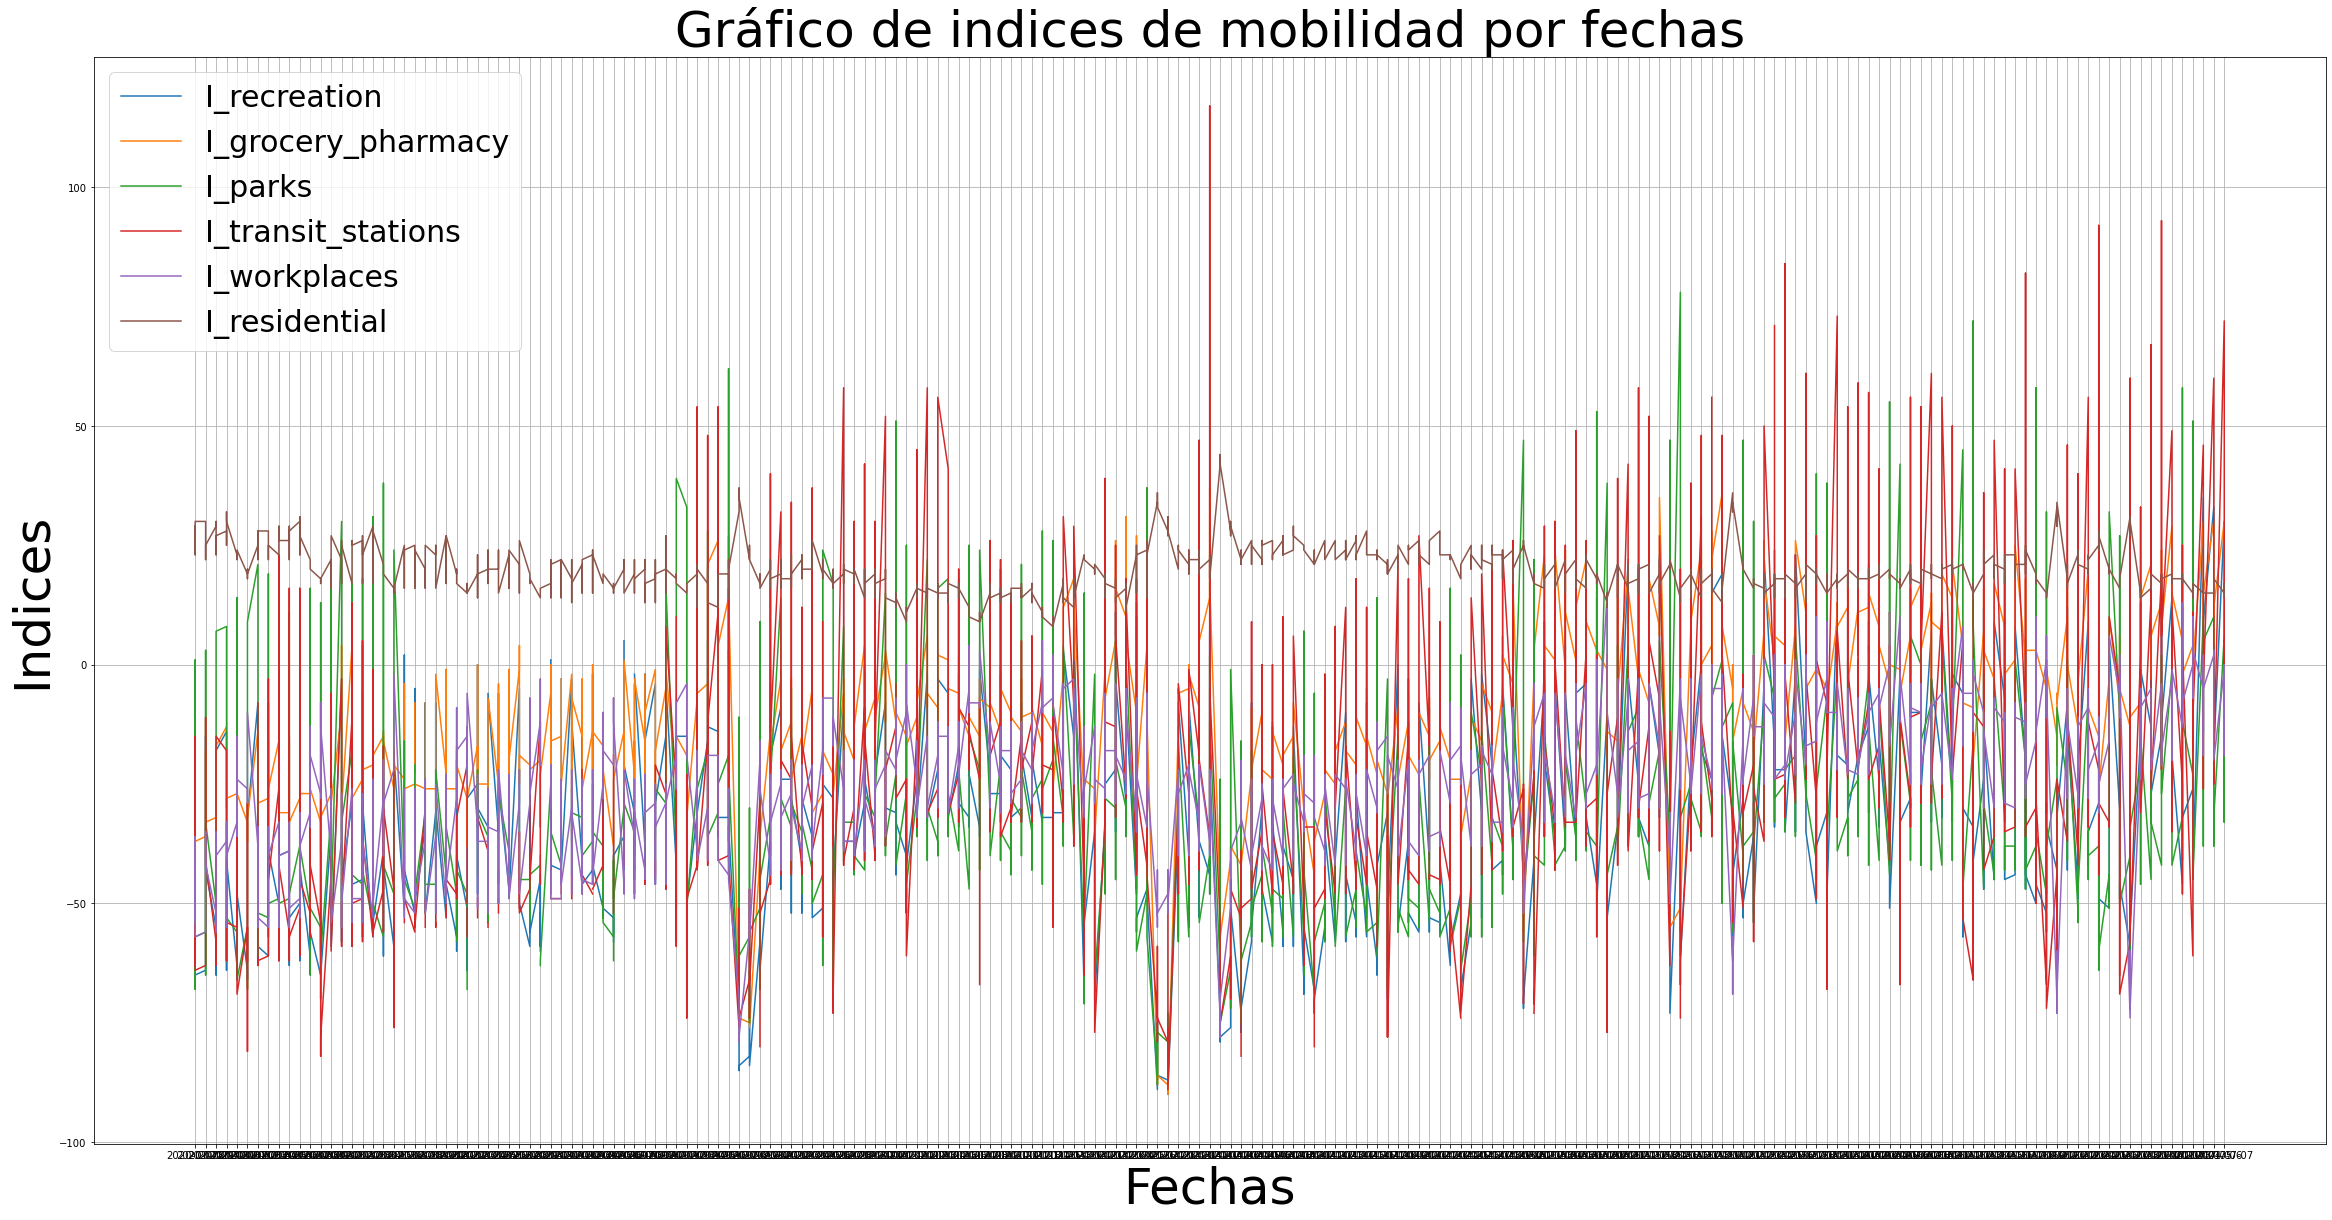

In [57]:
#Graficamos

x=Union["fecha"]
y1 = Union["I_recreation"]
y2 = Union["I_grocery_pharmacy"]
y3 = Union["I_parks"]
y4 = Union["I_transit_stations"]
y5 = Union["I_workplaces"]
y6 = Union["I_residential"]

plt.figure(figsize=(40,20))
plt.plot(x,y1, label = 'I_recreation')
plt.plot(x,y2, label = 'I_grocery_pharmacy')
plt.plot(x,y3, label = 'I_parks')
plt.plot(x,y4, label = 'I_transit_stations')
plt.plot(x,y5, label = 'I_workplaces')
plt.plot(x,y6, label = 'I_residential')


plt.xlabel("Fechas",fontsize=50)
plt.ylabel("Indices",fontsize=50)
plt.legend(fontsize=30)

plt.title('Gráfico de indices de mobilidad por fechas',fontsize=50)
plt.grid()
plt.show()